In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
import numpy as np
import json
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.patches as patches
from PIL import Image


In [0]:
drive = "drive/My Drive"
project_folder = "Manning Project"


# SVHN dataset

In [12]:
# SVHN dataset folder
svhn_folder = os.path.join(drive, project_folder, "svhn")
os.listdir(svhn_folder)

['test_32x32.mat', 'train_32x32.mat']

In [0]:
# load SVHN images with labels
svhn_train = loadmat(os.path.join(svhn_folder, 'train_32x32.mat'))
svhn_test = loadmat(os.path.join(svhn_folder, 'test_32x32.mat'))

In [16]:
list(svhn_train), list(svhn_test)

(['__header__', '__version__', '__globals__', 'X', 'y'],
 ['__header__', '__version__', '__globals__', 'X', 'y'])

In [0]:
# labels
lbls_train = svhn_train['y']
lbls_test = svhn_test['y']

In [0]:
# replace label "10" with "0"
lbls_train[np.where(lbls_train == 10)] = 0
lbls_test[np.where(lbls_test == 10)] = 0

In [0]:
# images
imgs_train = svhn_train['X']
imgs_test = svhn_test['X']

In [0]:
# width, height, channels, number of images (training/test set)
print(imgs_train.shape)
print(imgs_test.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [0]:
print(lbls_train.shape)
print(lbls_test.shape)

(73257, 1)
(26032, 1)


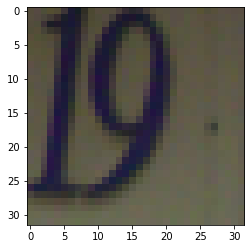

Digit: 9


In [31]:
# show an image
plt.imshow(imgs_train[:,:, :, 1])
plt.show()
print("Digit:", str(lbls_train[1][0]))

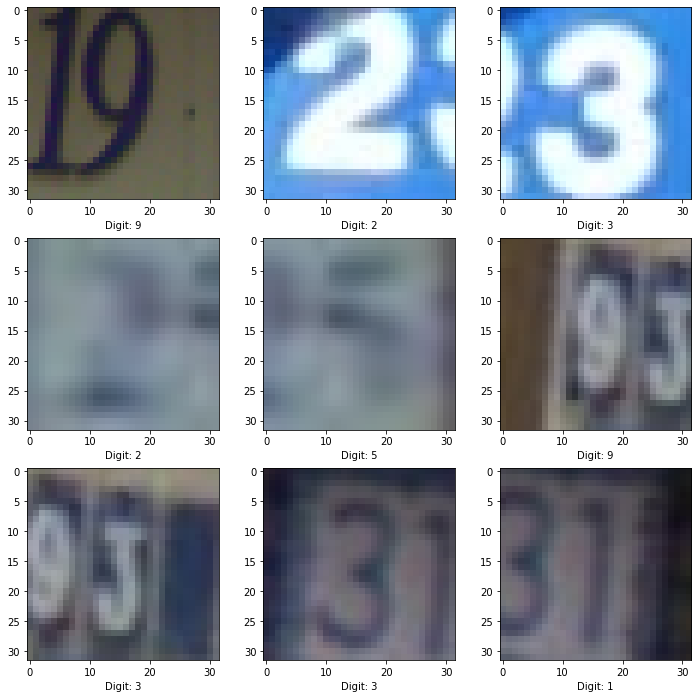

In [38]:
# show more images
fig = plt.figure(figsize = (12, 12))
for i in range(1,10):
  fig.add_subplot(3,3,i)
  plt.imshow(imgs_train[:, :, :, i])
  plt.xlabel("Digit: " + str(lbls_train[i][0]))
  
plt.show()

## COCO dataset


In [0]:
# This code downloads the coco dataset from Amazon S3 in parallel.

#import boto3
#from botocore import UNSIGNED
#from botocore.client import Config
#import multiprocessing
#import subprocess
#files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']
#
#s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
#def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
#    print("Downloading", file_name)
#    s3.download_file(bucket_name, file_name, file_name)
#    print("Finished downloading", file_name, ". Starting to unzip.")
#    subprocess.run(["unzip", file_name])
#    print("Finished unzipping", file_name)
#
## Download in parallel
#num_cpus = multiprocessing.cpu_count()
#with multiprocessing.Pool(num_cpus) as p:
#    p.map(download_and_unzip_from_s3, files)
#
#print("Done transferring all datasets")


In [43]:
coco_folder = os.path.join(drive, project_folder, "coco")
os.listdir(coco_folder)

['annotations', 'val2017']

In [50]:
coco_imgs_folder = os.path.join(coco_folder, "val2017")
coco_imgs = os.listdir(coco_imgs_folder)

# uploaded just a few images from the COCO dataset
coco_imgs

['000000000785.jpg',
 '000000000872.jpg',
 '000000397133.jpg',
 '000000309391.jpg',
 '000000003156.jpg']

In [0]:
coco_annotations_folder = os.path.join(coco_folder, "annotations")

In [0]:
# load annotations from .json file
with open(os.path.join(coco_annotations_folder, "person_keypoints_val2017.json"), 'r') as f:
    coco_val = json.load(f)

In [52]:
list(coco_val)

['info', 'licenses', 'images', 'annotations', 'categories']

In [53]:
# show info about some images
coco_val['images'][1:3]

[{'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'date_captured': '2013-11-14 20:55:31',
  'file_name': '000000037777.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'height': 230,
  'id': 37777,
  'license': 1,
  'width': 352},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'date_captured': '2013-11-14 22:32:02',
  'file_name': '000000252219.jpg',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'height': 428,
  'id': 252219,
  'license': 4,
  'width': 640}]

In [54]:
coco_val['images'][1].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [0]:
# get the info for all images
coco_val_images = coco_val['images']

In [60]:
# select an image to display (file name = 000000003156.jpg)
selected_image = next(item for item in coco_val_images if item["file_name"] == '000000003156.jpg')
print(selected_image)

{'license': 3, 'file_name': '000000003156.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000003156.jpg', 'height': 640, 'width': 443, 'date_captured': '2013-11-15 13:56:02', 'flickr_url': 'http://farm8.staticflickr.com/7012/6689259207_704baf44ef_z.jpg', 'id': 3156}


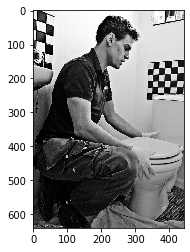

In [63]:
# display selected image
im = Image.open(os.path.join(coco_imgs_folder, selected_image['file_name']))

fig,ax = plt.subplots(1)
ax.imshow(im)

plt.show()

## Annotations


In [65]:
# how many annotations
annot_len = len(coco_val['annotations'])
print(annot_len)

11004


In [0]:
# all annotations for 'person' images (category_id = 1)
person = [] 

for i in range(0, annot_len):
  if(coco_val['annotations'][i]['category_id'] == 1):
     person.append(coco_val['annotations'][i])

In [67]:
person[1].keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])

In [68]:
# all annotations for the selected image
selected_annotations = next(item for item in person if item["image_id"] == selected_image['id'])
print(selected_annotations)


{'segmentation': [[8.65, 366.13, 30.27, 327.21, 41.8, 298.38, 54.77, 270.99, 54.77, 247.93, 61.98, 210.45, 76.4, 184.5, 90.81, 160, 103.78, 152.79, 121.08, 142.7, 147.03, 134.05, 162.88, 119.64, 172.97, 109.55, 180.18, 106.67, 184.5, 95.14, 183.06, 66.31, 197.48, 38.92, 204.68, 25.95, 220.54, 17.3, 240.72, 15.86, 260.9, 21.62, 276.76, 31.71, 283.96, 43.24, 286.85, 51.89, 292.61, 56.22, 307.03, 67.75, 311.35, 76.4, 302.7, 90.81, 294.05, 87.93, 292.61, 99.46, 291.17, 108.11, 285.41, 122.52, 285.41, 129.73, 285.41, 139.82, 275.32, 144.14, 270.99, 145.59, 266.67, 149.91, 263.78, 157.12, 259.46, 165.77, 256.58, 170.09, 250.81, 170.09, 247.93, 171.53, 239.28, 168.65, 230.63, 164.32, 221.98, 162.88, 219.1, 178.74, 221.98, 196.04, 226.31, 217.66, 227.75, 237.84, 232.07, 258.02, 242.16, 285.41, 249.37, 301.26, 275.32, 331.53, 295.5, 344.5, 307.03, 354.59, 321.44, 361.8, 337.3, 356.04, 356.04, 356.04, 366.13, 357.48, 364.68, 366.13, 356.04, 369.01, 353.15, 373.33, 345.95, 373.33, 320, 373.33, 30

In [70]:
# how many keypoints are on the image (max 17)
selected_annotations['num_keypoints'] 

15

In [71]:
# get keypoints (x, y, v)
kp = selected_annotations['keypoints']
kp = np.array(kp)
kp.shape

(51,)

In [0]:
# reshape 
kp = np.reshape(kp,(17,3))

In [74]:
# select only keypoints that are visible or occluded (v = 1 or 2)
idx_visible = np.where(kp[:,2]!=0)
kp_visible = kp[idx_visible,:]
kp_visible

array([[[277, 140,   2],
        [271, 112,   2],
        [226,  88,   2],
        [207, 197,   2],
        [134, 178,   2],
        [230, 311,   2],
        [149, 347,   2],
        [314, 367,   2],
        [277, 411,   2],
        [138, 365,   2],
        [ 35, 379,   2],
        [276, 447,   2],
        [284, 445,   2],
        [ 73, 521,   2],
        [121, 577,   2]]])

## Annotate selected image

In [75]:
selected_annotations['bbox']

[4.32, 15.86, 361.81, 619.82]

In [76]:
# bounding box for the selected image
x = selected_annotations['bbox'][0]
y = selected_annotations['bbox'][1]
width = selected_annotations['bbox'][2]
height = selected_annotations['bbox'][3]

print(x, y, width, height)

4.32 15.86 361.81 619.82


### Show bounding box

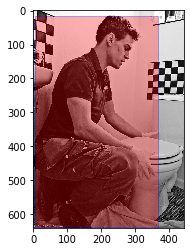

In [77]:
fig,ax = plt.subplots(1)

ax.imshow(im)

# create a rectangle patch
bbox = patches.Rectangle((x, y), width = width, height = height,linewidth=1,edgecolor='b',facecolor='r', alpha = 0.3)

ax.add_patch(bbox)

plt.show()

## Crop image

In [78]:
# size of the image in pixels (size of orginal image)  
im_width, im_height = im.size  
print("Width:" + str(im_width), "Height:" + str(im_height))

Width:443 Height:640


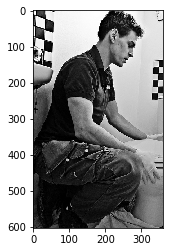

In [80]:
# setting the points for cropped image  
left = int(np.floor(x))
top = int(np.floor(y)) 
right = int(np.floor(x)) + int(np.floor(width)) 
bottom =  int(np.floor(height))

# sropped image of above dimension  
cropped = im.crop((left, top, right, bottom)) 

fig,ax = plt.subplots(1)
ax.imshow(cropped)

plt.show()


In [81]:
cropped.size

(361, 604)

## Resize image

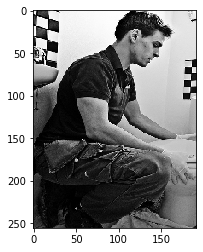

In [82]:
newsize = (192, 256) 
resized = cropped.resize(newsize) 

fig,ax = plt.subplots(1)
ax.imshow(resized)

plt.show()

### Add keypoints

In [83]:
coco_val.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [84]:
coco_val['categories']

[{'id': 1,
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'name': 'person',
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]],
  'supercategory': 'person'}]

In [85]:
# get lables for the keypoints
kp_lbl = coco_val['categories'][0]['keypoints']
kp_lbl

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [0]:
# keypoint lables for the selected images (only visible/occluded)
kp_visible_lbl = []

for i in range(0, len(idx_visible[0])):
    kp_visible_lbl.append(kp_lbl[idx_visible[0][i]])


In [87]:
kp_visible_lbl

['nose',
 'right_eye',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

##Original image keypoints

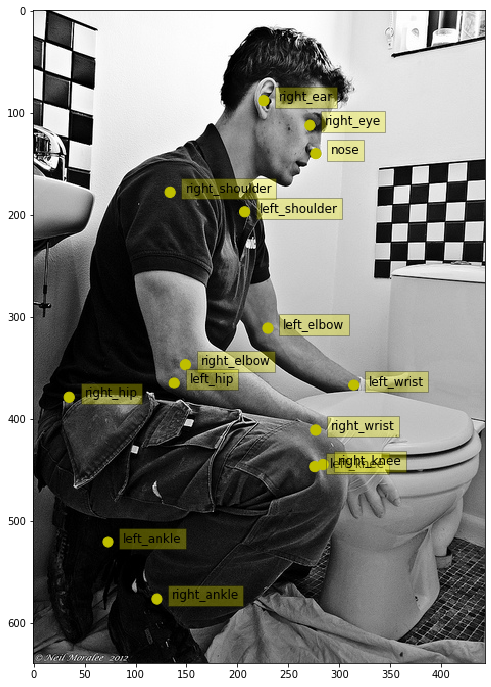

In [89]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(im)

for i in range(0, selected_annotations['num_keypoints']):
  ax.add_patch(patches.Circle((kp_visible[0,i,0],kp_visible[0,i,1]),radius = 5,fill = 'true', color='y'))
  
  # text alignment
  if(kp_visible[0,i,0]>im.size[0]*0.8):
    plt.text(kp_visible[0,i,0] - 15, kp_visible[0,i,1],kp_visible_lbl[i],horizontalalignment='right', bbox = dict(facecolor = 'yellow', alpha = 0.3), color = 'black', fontsize = 12)
  else:
    plt.text(kp_visible[0,i,0] + 15, kp_visible[0,i,1],kp_visible_lbl[i],horizontalalignment='left', bbox = dict(facecolor = 'yellow', alpha = 0.3), color = 'black', fontsize = 12)

plt.show()

## Resized image keypoints

In [0]:
# original image size
im.size

(443, 640)

In [0]:
# cropped image size
cropped.size

(361, 604)

In [0]:
# resized image size
resized.size

(192, 256)

In [90]:
# after resizing the image, aspect ratio has changed
# keypoints need to be adjusted 

resize_factor_x = resized.size[0] / cropped.size[0]
resize_factor_x

0.5318559556786704

In [91]:
resize_factor_y = resized.size[1] / cropped.size[1]
resize_factor_y

0.423841059602649

In [0]:
# adjusted keypoints
kp_visible_new = []

for i in range(0, len(kp_visible[0])):
  kp_visible_new.append(((kp_visible[0][i][0] - x)*resize_factor_x, (kp_visible[0][i][1] - y)*resize_factor_y))

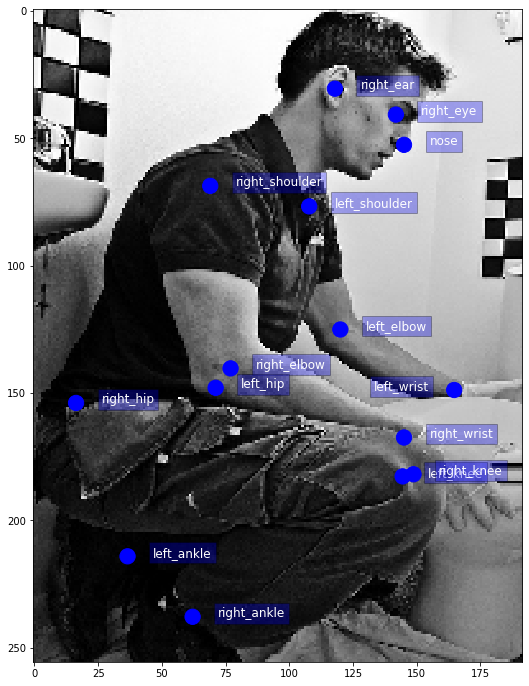

In [95]:
# disply cropped and resized image with adjusted keypoints
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(resized)

for i in range(0, selected_annotations['num_keypoints']):
  ax.add_patch(patches.Circle((kp_visible_new[i][0],kp_visible_new[i][1]),radius = 3, fill = 'true', color='b'))
  
  # text alignment
  if(kp_visible_new[i][0]>resized.size[0]*0.8):
    plt.text(kp_visible_new[i][0] - 10, kp_visible_new[i][1],kp_visible_lbl[i],horizontalalignment='right', bbox = dict(facecolor = 'blue', alpha = 0.3), color = 'white', fontsize = 12)
  else:
    plt.text(kp_visible_new[i][0] + 10, kp_visible_new[i][1],kp_visible_lbl[i],horizontalalignment='left', bbox = dict(facecolor = 'blue', alpha = 0.3), color = 'white', fontsize = 12)

plt.show()

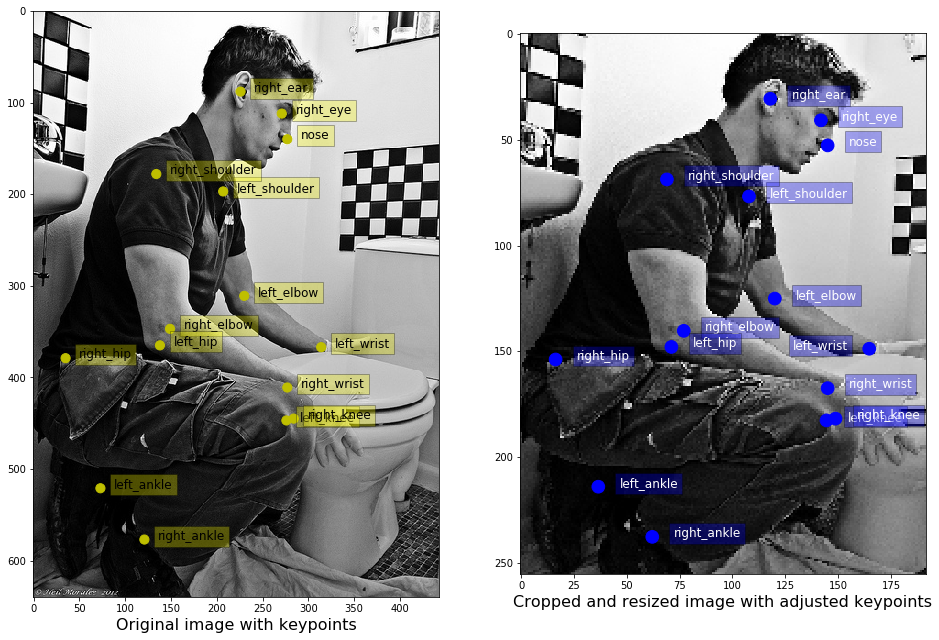

In [98]:
# plot both images (original and resized)

fig = plt.figure(figsize = (16,12))

ax = fig.add_subplot(121)
ax.imshow(im)

for i in range(0, selected_annotations['num_keypoints']):
  ax.add_patch(patches.Circle((kp_visible[0,i,0],kp_visible[0,i,1]),radius = 5,fill = 'true', color='y'))
  
  # text alignment
  if(kp_visible[0,i,0]>im.size[0]*0.8):
    plt.text(kp_visible[0,i,0] - 15, kp_visible[0,i,1],kp_visible_lbl[i],horizontalalignment='right', bbox = dict(facecolor = 'yellow', alpha = 0.3), color = 'black', fontsize = 12)
  else:
    plt.text(kp_visible[0,i,0] + 15, kp_visible[0,i,1],kp_visible_lbl[i],horizontalalignment='left', bbox = dict(facecolor = 'yellow', alpha = 0.3), color = 'black', fontsize = 12)

plt.xlabel("Original image with keypoints", fontsize = 16)

ax = fig.add_subplot(122)
ax.imshow(resized)

for i in range(0, selected_annotations['num_keypoints']):
  ax.add_patch(patches.Circle((kp_visible_new[i][0],kp_visible_new[i][1]),radius = 3, fill = 'true', color='b'))
  
  # text alignment
  if(kp_visible_new[i][0]>resized.size[0]*0.8):
    plt.text(kp_visible_new[i][0] - 10, kp_visible_new[i][1],kp_visible_lbl[i],horizontalalignment='right', bbox = dict(facecolor = 'blue', alpha = 0.3), color = 'white', fontsize = 12)
  else:
    plt.text(kp_visible_new[i][0] + 10, kp_visible_new[i][1],kp_visible_lbl[i],horizontalalignment='left', bbox = dict(facecolor = 'blue', alpha = 0.3), color = 'white', fontsize = 12)

plt.xlabel("Cropped and resized image with adjusted keypoints", fontsize = 16)

plt.show()